In [1]:
import cortex
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
from nilearn.image import resample_to_img
from nilearn import image, plotting, datasets
import nibabel as nib
subject = 'fsaverage'
xfm = 'standard'
#ref = '/home/vayzenb/anaconda/envs/pycortex/share/pycortex/db/fsaverage/transforms/standard/reference.nii.gz'
#xfm = '/home/vayzenb/anaconda/envs/pycortex/share/pycortex/db/fsaverage/transforms/standard/matrices.xfm'

/home/vayzenb/anaconda/envs/pycortex/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [3]:
study_dir = "/mnt/c/Users/vayze/Desktop/GitHub_Repos/docnet"
conj_dir = f'results/conjunction'

conds = [ 'depthloc', 'toolloc','distloc']
fsaverage = image.load_img(f"/home/vayzenb/anaconda/envs/pycortex/share/pycortex/db/fsaverage/anatomicals/raw.nii.gz")

#curr_img = image.load_img(f'{study_dir}/conjunction/{conj}_conj_cont.nii.gz') # load image

#curr_img = image.resample_to_img(curr_img, fsaverage) #resample to MNI
#nib.save(curr_img, f'{study_dir}/conjunction/{conj}_conj_cont_fsaverage.nii.gz')

In [27]:
def make_conj_flatmap(cond, filename):
    img = f'{conj_dir}/{cond}_spaceloc_conj_fsaverage.nii.gz'
    dv = cortex.Volume(img, subject,xfm, vmax = 1, vmin =0, cmap="Spectral_r")
    dv.data[dv.data <=.001] = np.nan
    cortex.quickflat.make_figure(dv,with_curvature=True,with_rois= False, with_colorbar = True)
    #cortex.quickflat.make_png(f'{study_dir}/figures/{filename}.png',dv, with_curvature=True, dpi = 300,with_rois= False, with_colorbar = False)
    #cortex.webgl.show(data=dv) 

In [5]:
def make_stat_figure(exp, max_val, min_val):
    img = f'{study_dir}/whole_brain/{exp}_zstat_fsaverage.nii.gz'
    dv = cortex.Volume(img, subject,xfm, vmax = int(max_val), vmin = int(min_val), cmap = "YlOrRd_r")
    print(max_val)
    dv.data[dv.data <=.1] = np.nan

    cortex.webgl.show(data=dv) 
    cortex.quickflat.make_png(f'{study_dir}/figures/{exp}_flat.png',dv, with_curvature=True, dpi = 300,with_rois= False, with_colorbar = False)

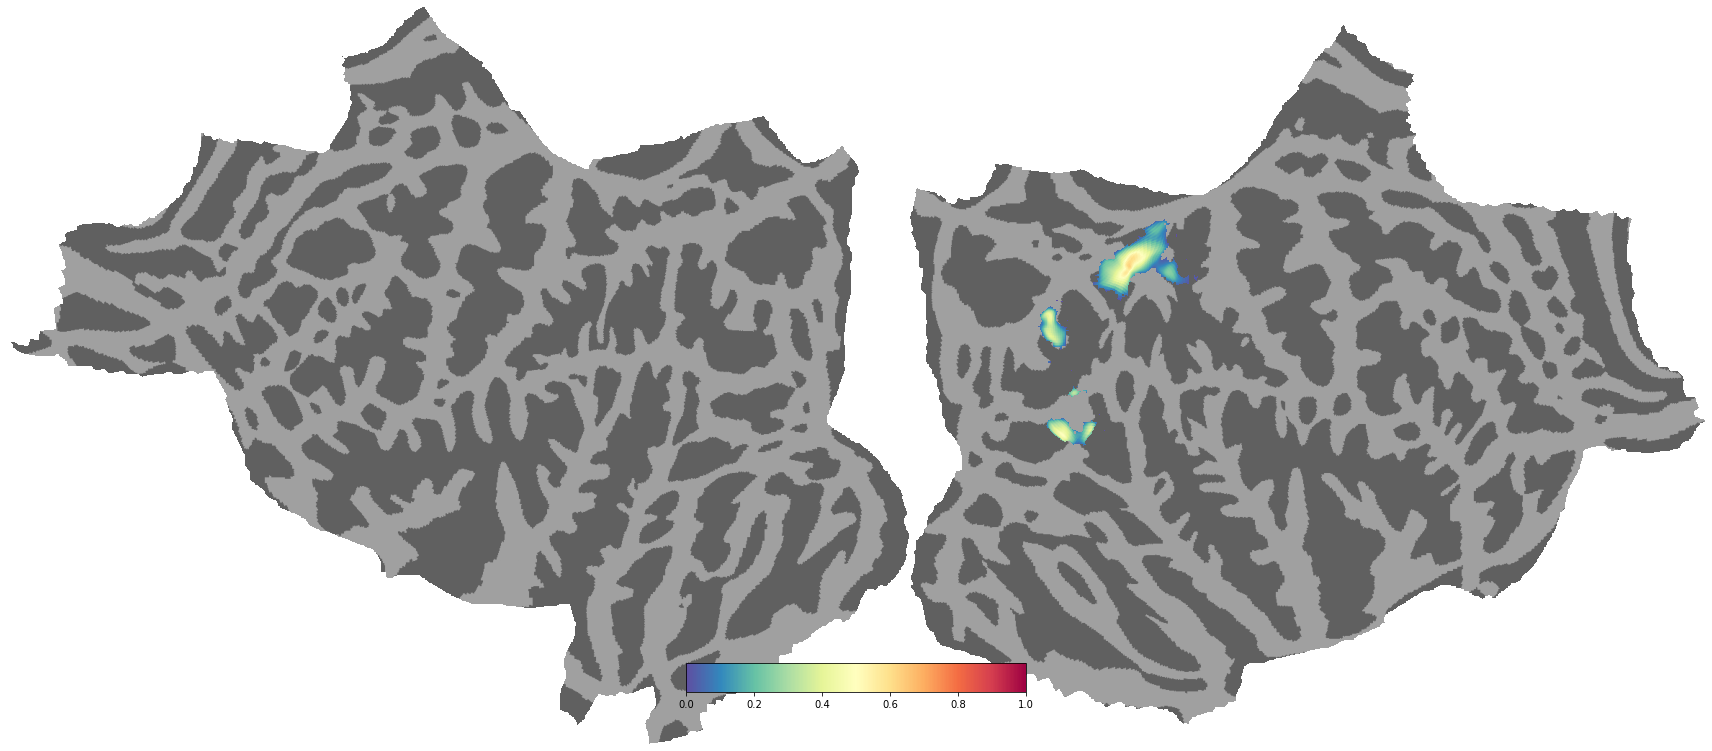

In [31]:
ct = "depthloc"
conj = image.load_img(f'{conj_dir}/{ct}_spaceloc_conj.nii.gz')
conj_img = image.resample_to_img(conj, fsaverage) #resample to MNI
nib.save(conj_img, f'{conj_dir}/{ct}_spaceloc_conj_fsaverage.nii.gz')

make_conj_flatmap(ct, f'{ct}_spaceloc_conjuction')


Generating a flatmap cache


/home/vayzenb/anaconda/envs/pycortex/lib/python3.7/site-packages/cortex/mapper/samplers.py:96: RuntimeWarning: divide by zero encountered in true_divide
  out[sel] = np.sin(np.pi * selx) * np.sin(np.pi * selx / window) * (window / (np.pi**2 * selx**2))
/home/vayzenb/anaconda/envs/pycortex/lib/python3.7/site-packages/cortex/mapper/samplers.py:96: RuntimeWarning: invalid value encountered in multiply
  out[sel] = np.sin(np.pi * selx) * np.sin(np.pi * selx / window) * (window / (np.pi**2 * selx**2))


IndexError: boolean index did not match indexed array along dimension 0; dimension is 327684 but corresponding boolean dimension is 1317562

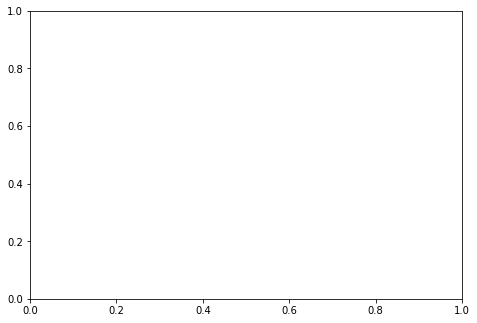

In [12]:
"""
make conjunction map
"""

exp = 'distloc'
space_dir = f'{study_dir}/whole_brain/fsl/HighLevel_spaceloc.gfeat/cope1.feat'
exp_dir= f'{study_dir}/whole_brain/fsl/HighLevel_{exp}.gfeat/cope1.feat'

#load cluster mask and cluster mask then convert to np
space_mask = image.load_img(f'{space_dir}/cluster_mask_zstat1.nii.gz')
affine = space_mask.affine
exp_mask = image.load_img(f'{exp_dir}/cluster_mask_zstat1.nii.gz')
space_img = image.get_data(space_mask)
exp_img = image.get_data(exp_mask)

#binarize masks
space_img[space_img[:,:,:] >0] = 1 
exp_img[exp_img[:,:,:] >0] = 3

#the overlapping voxels will be 4 here
combined_img = space_img + exp_img
combined_img = np.rint(combined_img)

# set back to 2 so that it is between space and  the exp cond
combined_img[combined_img[:,:,:] == 4] = 2


combined_img = nib.Nifti1Image(combined_img, affine) #convert back to volume
nib.save(combined_img, f'{study_dir}/conjunction/spaceloc_{exp}_combined_fsaverage.nii.gz')
combined_img = image.resample_to_img(combined_img, fsaverage) #resample to MNI
nib.save(combined_img, f'{study_dir}/conjunction/spaceloc_{exp}_combined_fsaverage.nii.gz')

make_flatmap(exp, f'spaceloc_{exp}_conjuction')

    


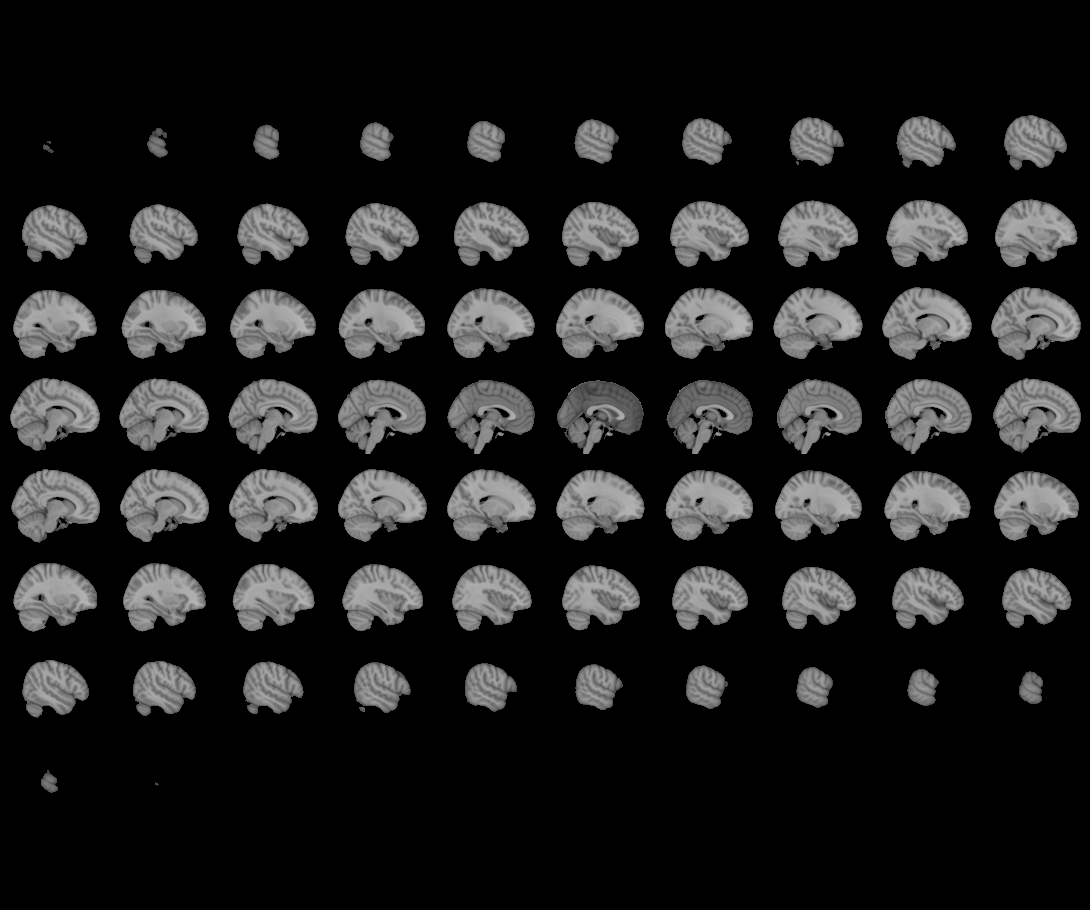
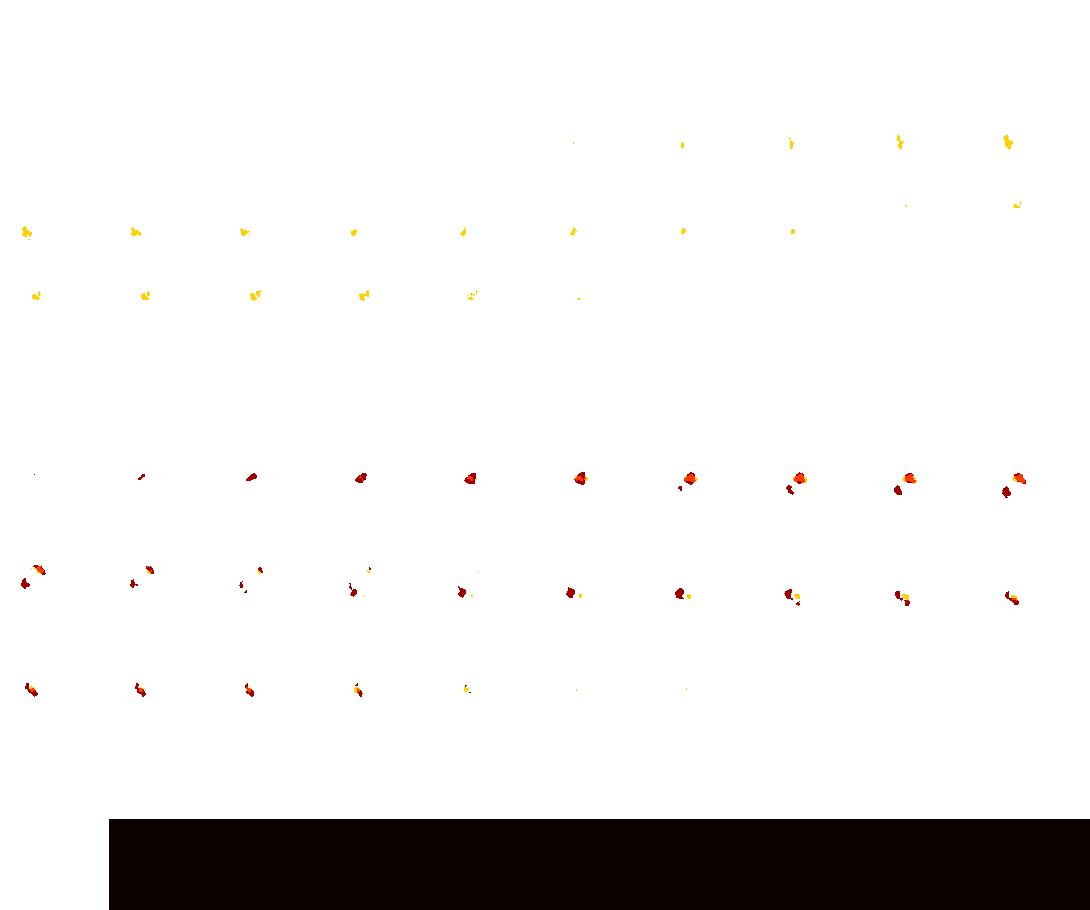

In [67]:
plotting.view_img(combined_img)

In [31]:
"""
old conjunction map
"""

for exp in exps:
    
    space_img =image.load_img(f'{study_dir}/conjunction/spaceloc_sep.nii.gz') # load image 
    conj_img = image.load_img(f'{study_dir}/conjunction/spaceloc_{exp}_conj_bin.nii.gz') # load image
    exp_img = image.load_img(f'{study_dir}/conjunction/{exp}_sep.nii.gz') # load image
    affine = space_img.affine

    #convert to numpy
    space_img = image.get_data(space_img)
    exp_img = image.get_data(exp_img)
    conj_img = image.get_data(conj_img)

    combined_img = np.zeros(space_img.shape)

    combined_img[space_img[:,:,:] ==1 ] = 1
    combined_img[exp_img[:,:,:] ==1] = 3
    combined_img[conj_img[:,:,:] == 2] = 2

    #combined_img = space_img + conj_img + exp_img
    combined_img = nib.Nifti1Image(combined_img, affine) #convert back to volume
    combined_img = image.resample_to_img(combined_img, fsaverage) #resample to MNI
    nib.save(combined_img, f'{study_dir}/conjunction/spaceloc_{exp}_combined_fsaverage.nii.gz')
    
    make_flatmap(exp)
    

TypeError: make_flatmap() missing 3 required positional arguments: 'max_val', 'min_val', and 'filename'

In [5]:
exp = 'depthloc'
stat_dir = f'{study_dir}/whole_brain/fsl/HighLevel_{exp}.gfeat/cope1.feat'

#load zstat and cluster mask then convert to np
stat_img = image.load_img(f'{stat_dir}/stats/zstat1.nii.gz')
affine = stat_img.affine
stat_img = image.get_data(stat_img)
max_val = np.max(stat_img)
mask = image.get_data(image.load_img(f'{stat_dir}/cluster_mask_zstat1.nii.gz'))

mask[mask[:,:,:] >0] = 1 
#extract only values in mask
stat_img[mask[:, :, :] != 1] = 0 

stat_img = nib.Nifti1Image(stat_img, affine)
stat_img = image.resample_to_img(stat_img, fsaverage) #resample to MNI
nib.save(stat_img, f'{study_dir}/whole_brain/{exp}_zstat_fsaverage.nii.gz')
         
make_stat_figure(exp, max_val, 3)
#make_flatmap(exp, max_val, 3, f'{exp}_flat')
#r-orient = 240, 60, 400
#l-orient = 130, 60, 400

3.303215
Started server on port 38698


In [37]:
stat_dir

'/mnt/c/Users/vayze/Documents/Research/Projects/DocNet/SpaceLoc/whole_brain/fsl/HighLevel_distloc.gfeat/cope1.feat'


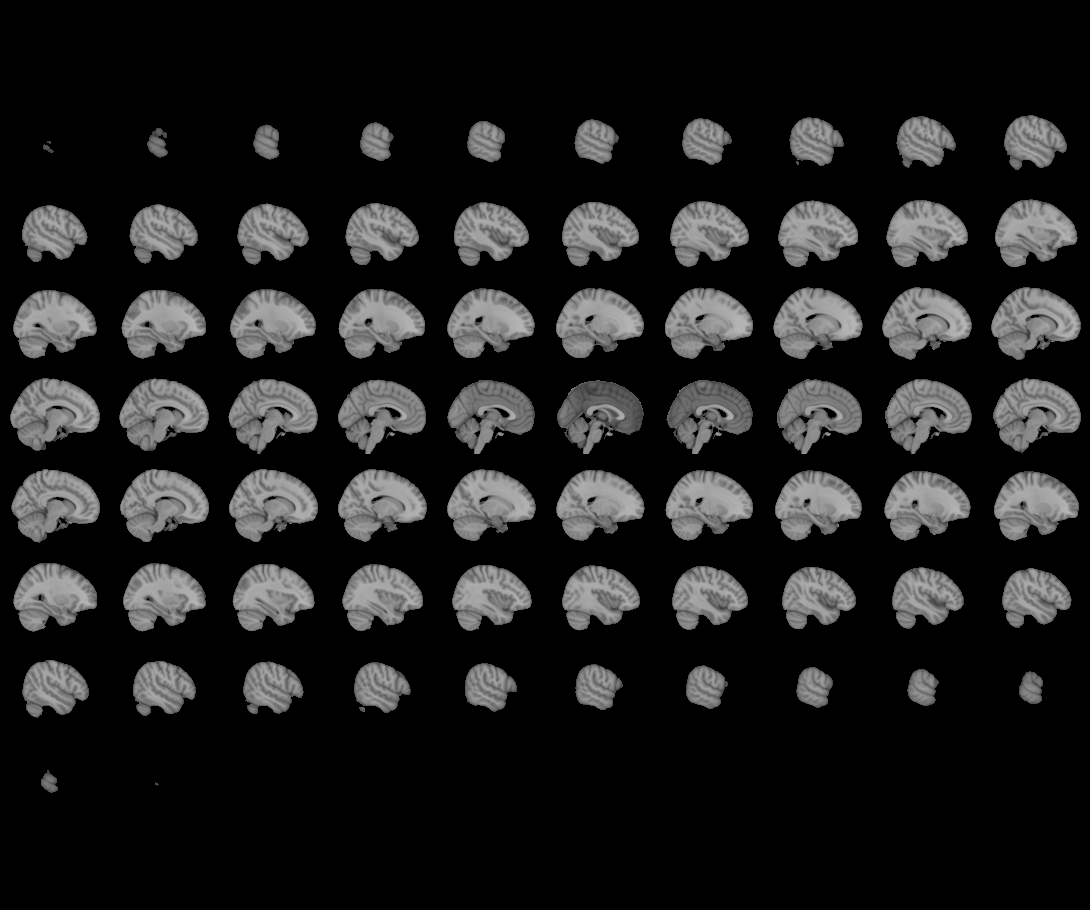
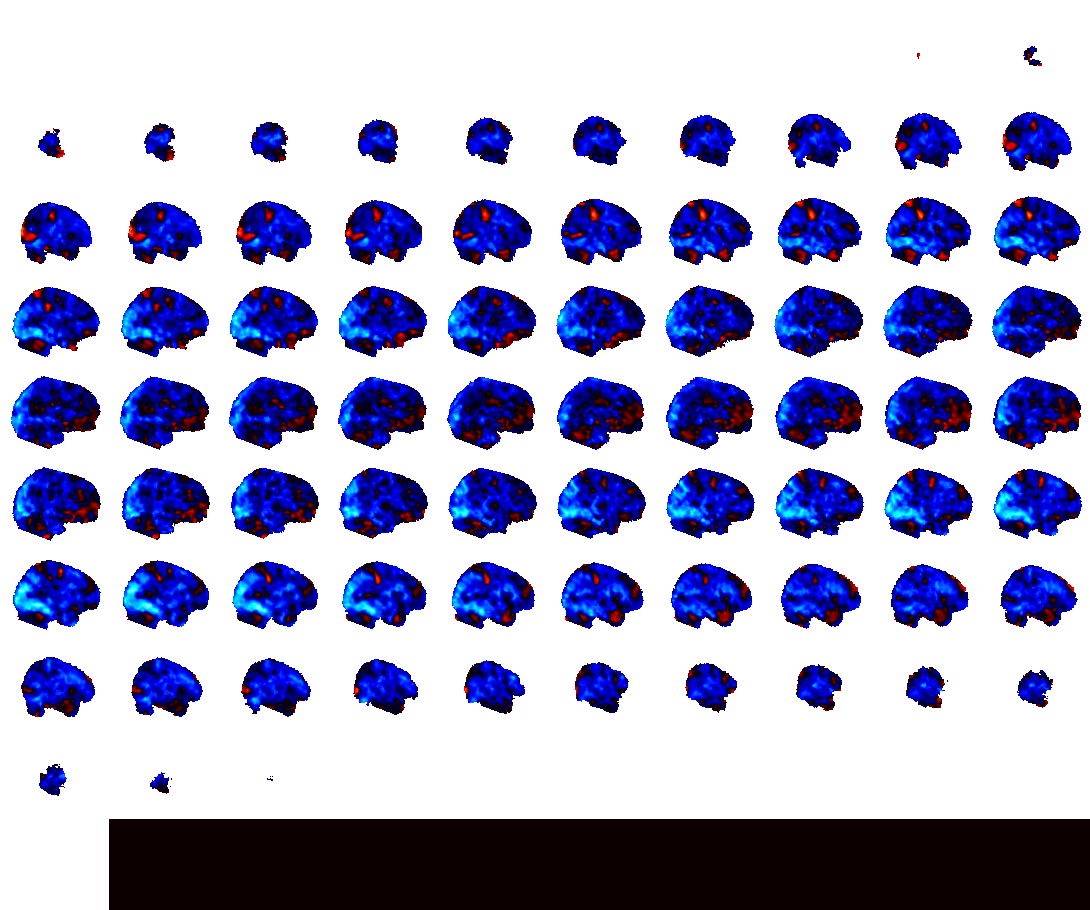

In [56]:
exp = 'depthloc'
stat_dir = f'{study_dir}/whole_brain/fsl/HighLevel_{exp}.gfeat/cope1.feat'

plotting.view_img(f'{stat_dir}/stats/zstat1.nii.gz')


/home/vayzenb/anaconda/envs/pycortex/lib/python3.7/site-packages/nilearn/plotting/find_cuts.py:68: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  .format(DEFAULT_CUT_COORDS))
/home/vayzenb/anaconda/envs/pycortex/lib/python3.7/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/vayzenb/anaconda/envs/pycortex/lib/python3.7/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


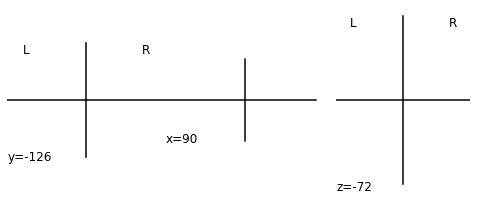

In [57]:
plotting.plot_roi(f'{stat_dir}/cluster_mask_zstat1.nii.gz')